# Лабораторна робота №1

## Аналізуємо Quicksort та Mergesort

### Завдання 1:

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from collections import defaultdict

In [2]:
def benchmark(f, *args, **kvargs):
    t = time()
    y = f(*args, **kvargs)
    dt = time() - t
    return y, dt

$$ C_n = n + 1 + \frac{1}{n} \sum _{i=1} ^{n} (C_{i-1} + C_{n-i}), C_{0} = C_{1} = 0 $$

In [3]:
def Cn_a(_n):
    c = [0] * (_n + 3)
    c[0] = 0
    for n in range(1, _n + 1):
        c[n] = n + 1 + 1 / n * sum([c[i - 1] + c[n - i] for i in range(1, n + 1)])
    return c[_n]

$$ C_n = \frac{n+1}{n} C_{n-1} + 2, C_{0} = 0 $$

In [4]:
def Cn_b(_n):
    c = [0] * (_n + 2)
    c[0] = 0
    for n in range(1, _n + 1):
        c[n] = (n + 1) / n * c[n - 1] + 2
    return c[_n]

$$ C_{n} = 2 n \log n $$

In [5]:
def Cn_hardcode(n):
    return 2*n*np.log(n)

In [6]:
for n in [10 ** i for i in range(2, 4)]:
    print(f"n = {n}")
    val1, t1 = benchmark(Cn_a, n)
    print(f"Обчислення Cn першим методом: n={n}, value={val1}, time={t1} sec")
    val2, t2 = benchmark(Cn_b, n)
    print(f"Обчислення Cn другим методом: n={n}, value={val2}, time={t2} sec")
    val3, t3 = benchmark(Cn_hardcode, n)
    print(f"Обчислення Cn формулою методом: n={n}, value={val3}, time={t3} sec")
    print() 

n = 100
Обчислення Cn першим методом: n=100, value=847.8502585632034, time=0.000789642333984375 sec
Обчислення Cn другим методом: n=100, value=847.8502585632028, time=2.1457672119140625e-05 sec
Обчислення Cn формулою методом: n=100, value=921.0340371976183, time=2.4557113647460938e-05 sec

n = 1000
Обчислення Cn першим методом: n=1000, value=12985.912662821804, time=0.06616544723510742 sec
Обчислення Cn другим методом: n=1000, value=12985.91266282178, time=0.00013375282287597656 sec
Обчислення Cn формулою методом: n=1000, value=13815.510557964273, time=9.5367431640625e-06 sec



### Завдання 2:

$$ H_{n} = \sum _{i=1} ^{n} \frac{1}{i} = \gamma + \log n + \frac{1}{2n} + O(\frac{1}{n^2}) $$

In [7]:
def Hn(n):
    gamma = 0.577215664901532860606512
    return gamma + np.log(n) + 1 / (2 * n)

$$ C_{n} = 2(n+1)(H_{n+1} - 1) $$ 

In [8]:
def Cn_approx(n):
    gamma = 0.577215664901532860606512
    return 2 * (n + 1) * (Hn(n + 1) - 1)   

In [9]:
for n in [10 ** i for i in range(2, 6)]:
    err = abs(Cn_approx(n) - Cn_b(n))
    print(f"Похибка апроксимації для n={n}: {err}")

Похибка апроксимації для n=100: 0.0016501488411222454
Похибка апроксимації для n=1000: 0.00016650015822960995
Похибка апроксимації для n=10000: 1.66652025654912e-05
Похибка апроксимації для n=100000: 1.7099082469940186e-06


In [31]:
print("Швидкість виконання:")
for n in [10 ** i for i in range(2, 6)]:
    print(f"Час обчислення за рекурсією для n={n}:                    {benchmark(Cn_b, n)[1]} s")    
    print(f"Час обчислення апроксимацієї гармонічних чисел для n={n}: {benchmark(Cn_approx, n)[1]} s\n")
print("Отже, час виконання практично однаковий.")

Швидкість виконання:
Час обчислення за рекурсією для n=100:                    7.033348083496094e-05 s
Час обчислення апроксимацієї гармонічних чисел для n=100: 7.081031799316406e-05 s

Час обчислення за рекурсією для n=1000:                    0.0005934238433837891 s
Час обчислення апроксимацієї гармонічних чисел для n=1000: 3.2901763916015625e-05 s

Час обчислення за рекурсією для n=10000:                    0.006595611572265625 s
Час обчислення апроксимацієї гармонічних чисел для n=10000: 5.245208740234375e-05 s

Час обчислення за рекурсією для n=100000:                    0.028536558151245117 s
Час обчислення апроксимацієї гармонічних чисел для n=100000: 3.3855438232421875e-05 s

Отже, час виконання практично однаковий.


### Завдання 3:

In [32]:
def quicksort(a, lo, hi):
    comparison_counter = 0
    transpos_counter = 0
        
    if (lo >= hi):
        return (0, 0)
    
    i, j = lo - 1, hi
    v = a[hi]
    
    while True:
        i += 1
        comparison_counter += 1
        while (a[i] < v and i != hi):
            i += 1
            comparison_counter += 1
        
        j -= 1
        comparison_counter += 1
        while (v < a[j] and j != lo):
            j -= 1
            comparison_counter += 1
            
        comparison_counter += 1    
        if i >= j:
            break
            
        transpos_counter += 1
        a[i], a[j] = a[j], a[i]
        
    transpos_counter += 1
    a[i], a[hi] = a[hi], a[i]
        
    c1, t1 = quicksort(a, lo, i-1)
    c2, t2 = quicksort(a, i+1, hi)
    
    return comparison_counter + c1 + c2, transpos_counter + t1 + t2    

Час роботи алгоритму Quicksort для масиву з $ n $ елементів  $ \approx C n \ln(n), C=const $ 

In [43]:
cc = 0
for i in range(10):
    n = 10 ** 4
    test_array = list(np.random.choice(range(n), n))
    (comps, trans), dt = benchmark(quicksort, test_array, 0, n - 1)
    C = dt / (n * np.log(n))
    cc += C
cc = cc / 10
C = cc
print(f"C = {C}\n")

for n in [10 ** i for i in range(3, 7)]:
    array = list(np.random.choice(range(n), n))
    _, dt = benchmark(quicksort, array, 0, n - 1)
    forecast = C * n * np.log(n)
    print(f"Size of array: {n}\nEstimated time: {dt}\nPrognozed time: {forecast}\n")
    
print("Отже, прогноз є точним не для всіх n.")

C = 2.433159358193918e-07

Size of array: 1000
Estimated time: 0.0030052661895751953
Prognozed time: 0.0016807669401168823

Size of array: 10000
Estimated time: 0.03122568130493164
Prognozed time: 0.022410225868225102

Size of array: 100000
Estimated time: 0.2845494747161865
Prognozed time: 0.2801278233528138

Size of array: 1000000
Estimated time: 3.5600361824035645
Prognozed time: 3.3615338802337646

Отже, прогноз є точним не для всіх n.


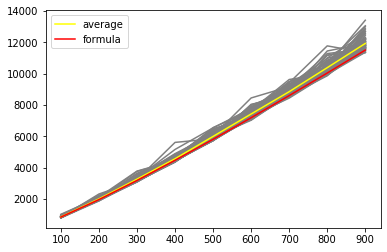

In [13]:
n_array = [i for i in range(10 ** 2, 10 ** 3, 100)] 
comparisons_array = []
average_array = []
cn_array = []

for n in n_array:
    arrays = [list(np.random.choice(range(9), n)) for i in range(100)]
    comparisons = [benchmark(quicksort, array, 0, n - 1)[0][0] for array in arrays]
    comparisons_array.append(comparisons)
    average = np.average(comparisons)
    average_array.append(average)
    cn = Cn_b(n)
    cn_array.append(cn)
    
for comparisons in zip(*comparisons_array):
    plt.plot(n_array, comparisons, c='gray')
plt.plot(n_array, average_array, label='average', c='yellow')
plt.plot(n_array, cn_array, label='formula', c='red')

plt.legend();

### Завдання 4:

Розглядаються такі значення n: [9]


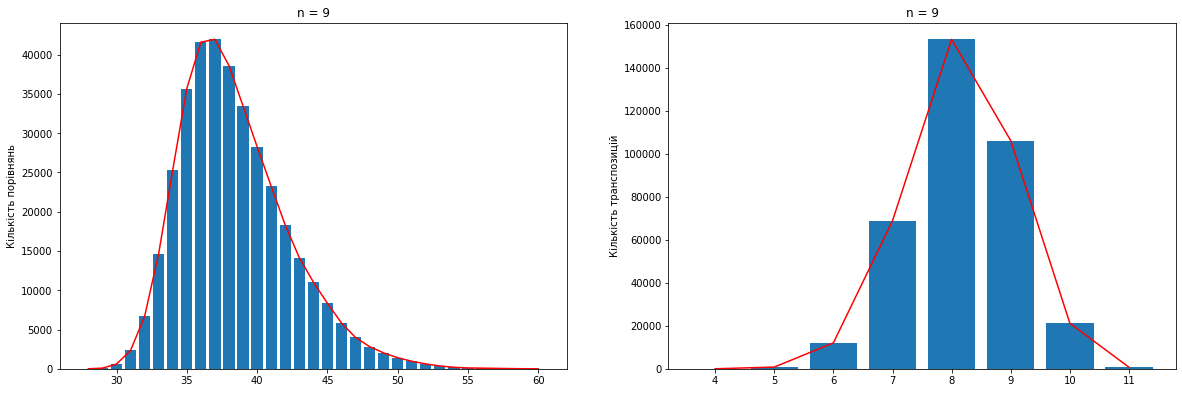

In [62]:
n_array = [9]
print(f"Розглядаються такі значення n: {n_array}")
plt.figure(figsize=(20, 14))
i = 0

for n in n_array:
    i += 1
    f_c = defaultdict(int)
    f_t = defaultdict(int)
    for p in permutations(range(1, n + 1)):
        c, t = quicksort(list(p), 0, len(p) - 1)
        f_c[c] += 1
        f_t[t] += 1    
    plt.subplot(2, 2, i)
    plt.title(f"n = {n}")
    plt.ylabel("Кількість порівнянь")
    plt.bar(f_c.keys(), f_c.values())
    plt.plot(*list(zip(*sorted(f_c.items(), key=lambda x: x[0]))), c='red')
    i += 1
    plt.subplot(2, 2, i)
    plt.title(f"n = {n}")
    plt.ylabel("Кількість транспозицій")
    plt.bar(f_t.keys(), f_t.values())
    plt.plot(*list(zip(*sorted(f_t.items(), key=lambda x: x[0]))), c='red')

plt.show();

### Завдання 5:

In [22]:
def mergesort(arr): 
    comp_count = 0
    merge_count = 0
    def _mergesort(arr):
        nonlocal comp_count, merge_count
        if len(arr) >1:
            comp_count += 1
            mid = len(arr)//2
            L = arr[:mid]
            R = arr[mid:]
            merge_count += 1
            _mergesort(L)
            _mergesort(R)

            i = j = k = 0

            while i < len(L) and j < len(R): 
                if L[i] < R[j]:
                    comp_count += 1
                    arr[k] = L[i] 
                    i+=1
                else: 
                    arr[k] = R[j] 
                    j+=1
                k+=1

            while i < len(L):
                arr[k] = L[i] 
                i+=1
                k+=1

            while j < len(R):
                arr[k] = R[j] 
                j+=1
                k+=1
    _mergesort(arr)
    return comp_count, merge_count

Час роботи алгоритму Mergesort для масиву з $ n $ елементів  $ \approx C n \lg(n), C=const $ 

In [23]:
n = 10 ** 4
array = [list(np.random.choice(range(n), n)) for i in range(10)]
times = [benchmark(mergesort, array[i])[1] for i in range(10)]
av_time = np.average(times)
C = av_time / (n * np.log(n)) 
print(f"C = {C}\n")
print(times[0]/(n*np.log(n)))

for n in [10 ** i for i in range(1, 7)]:
    array = list(np.random.choice(range(n), n))
    _, dt = benchmark(mergesort, array)
    forecast = C * (n * np.log(n))
    print(f"Size of array: {n}\nEstimated time: {dt}\nPrognozed time: {forecast}\n")

print("Отже, прогноз є точним не для всіх n.")

C = 4.1657175723563514e-07

5.314829357917903e-07
Size of array: 10
Estimated time: 2.4318695068359375e-05
Prognozed time: 9.591919183731081e-06

Size of array: 100
Estimated time: 0.0002522468566894531
Prognozed time: 0.0001918383836746216

Size of array: 1000
Estimated time: 0.0036063194274902344
Prognozed time: 0.0028775757551193237

Size of array: 10000
Estimated time: 0.04303336143493652
Prognozed time: 0.03836767673492432

Size of array: 100000
Estimated time: 0.46155595779418945
Prognozed time: 0.479595959186554

Size of array: 1000000
Estimated time: 5.989622354507446
Prognozed time: 5.7551515102386475

Отже, прогноз є точним не для всіх n.


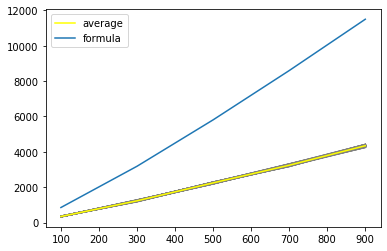

In [30]:
n_array = [i for i in range(10 ** 2, 10 ** 3, 200)] 
comparisons_array = []
average_array = []
cn_array = []

for n in n_array:
    arrays = [list(np.random.choice(range(9), n)) for i in range(100)]
    comparisons = [benchmark(mergesort, array)[0][0] for array in arrays]
    comparisons_array.append(comparisons)
    average = np.average(comparisons)
    average_array.append(average)
    cn = Cn_approx(n)
    cn_array.append(cn)
    
for comparisons in zip(*comparisons_array):
    plt.plot(n_array, comparisons, c='gray')
plt.plot(n_array, average_array, label='average', c='yellow')
plt.plot(n_array, cn_array, label='formula')

plt.legend();

Розглядаються такі значення n: [9]


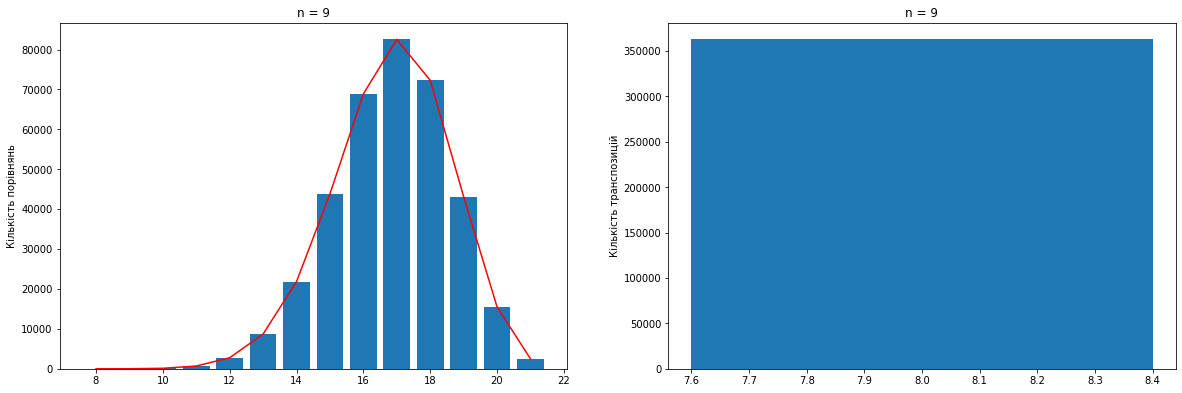

In [63]:
n_array = [9]
print(f"Розглядаються такі значення n: {n_array}")
plt.figure(figsize=(20, 14))
i = 0

for n in n_array:
    i += 1
    f_c = defaultdict(int)
    f_t = defaultdict(int)
    for p in permutations(range(1, n + 1)):
        c, t = mergesort(list(p))
        f_c[c] += 1
        f_t[t] += 1    
    plt.subplot(2, 2, i)
    plt.title(f"n = {n}")
    plt.ylabel("Кількість порівнянь")
    plt.bar(f_c.keys(), f_c.values())
    plt.plot(*list(zip(*sorted(f_c.items(), key=lambda x: x[0]))), c='red')
    i += 1
    plt.subplot(2, 2, i)
    plt.title(f"n = {n}")
    plt.ylabel("Кількість транспозицій")
    plt.bar(f_t.keys(), f_t.values())
    plt.plot(*list(zip(*sorted(f_t.items(), key=lambda x: x[0]))), c='red')

plt.show();

In [59]:
t_quicksort = 0
t_mergesort = 0

for i in range(10):
    n = 1000
    array = list(np.random.choice(range(n), n))
    (comps, trans), dt_quicksort = benchmark(quicksort, array, 0, n - 1)
    (comps, trans), dt_mergesort = benchmark(mergesort, array)
    t_quicksort += dt_quicksort    
    t_mergesort += dt_mergesort

print(f"Quicksort: {t_quicksort / 10}")
print(f"Mergesort: {t_mergesort / 10}")

Quicksort: 0.0024877309799194334
Mergesort: 0.0036174535751342775
